In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
#from cap2vid.dataset.generalized_gif_caption_generation import show_gif_subplots
from keras.models import *
from keras.layers import Input, merge, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Cropping2D, AvgPool2D
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import preprocessing
from keras.preprocessing import image
import keras
import cv2
import tqdm
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Read in the pickle files
path_x = '/Users/kmotwani/Dropbox/Data Science 209b Final Project/cap2vid/dataset/walking/pickle_x_'
path_y = '/Users/kmotwani/Dropbox/Data Science 209b Final Project/cap2vid/dataset/walking/pickle_y.pkl'
caption_dict = {0:'a man is walking left',1:'a man is walking right'}
X = []
for i in range(1,6):  
    if i==5:
        f = open(path_y, 'rb')
        Y = pickle.load(f)
        f.close()
        for ind, temp in enumerate(Y):
            Y[ind] = caption_dict[Y[ind]]
        break
    f = open(path_x + str(i) +'.pkl', 'rb')
    X.extend(pickle.load(f))
    f.close()

In [3]:
#Convert to Numpy Arrays
for i in range(len(X)):
    X[i] = np.array(X[i], dtype=np.float32)[:,:,:,0]

In [4]:
from skimage.transform import resize
#Convert to Image
for ind,i in enumerate(X):
    temp_image = i[int(i.shape[0]/2),:,:]
    X[ind] = temp_image/(temp_image.max()/1)   

In [5]:
import pandas as pd
df = pd.DataFrame(columns=['Image','Caption'])
df['Image'] = X
df['Caption'] = Y
display(df.head())

,Image,Caption
0,"[[0.8781726, 0.8781726, 0.8781726, 0.87309647,...",a man is walking left
1,"[[0.77828056, 0.77375567, 0.7692308, 0.7647059...",a man is walking right
2,"[[0.94054055, 0.95135134, 0.95135134, 0.929729...",a man is walking left
3,"[[0.6625, 0.6791667, 0.69166666, 0.6958333, 0....",a man is walking right
4,"[[0.9211823, 0.9162561, 0.9162561, 0.9211823, ...",a man is walking left


In [6]:
#Definr Paths
from skimage import io
save_image_path = '/Users/kmotwani/Desktop/Me/Education/Courses/APCOMP 209B/Dataset_Walking/'
save_text_path = '/Users/kmotwani/Desktop/Me/Education/Courses/APCOMP 209B/Dataset_Walking/'

1 / 400
(120, 160)
2 / 400
(120, 160)
3 / 400
(120, 160)
4 / 400
(120, 160)
5 / 400
(120, 160)
6 / 400
(120, 160)
7 / 400
(120, 160)
8 / 400
(120, 160)
9 / 400
(120, 160)
10 / 400
(120, 160)
11 / 400
(120, 160)
12 / 400
(120, 160)
13 / 400
(120, 160)
14 / 400
(120, 160)
15 / 400
(120, 160)
16 / 400
(120, 160)
17 / 400
(120, 160)
18 / 400
(120, 160)
19 / 400
(120, 160)
20 / 400
(120, 160)
21 / 400
(120, 160)
22 / 400
(120, 160)
23 / 400
(120, 160)
24 / 400
(120, 160)
25 / 400
(120, 160)
26 / 400
(120, 160)
27 / 400
(120, 160)
28 / 400
(120, 160)
29 / 400
(120, 160)
30 / 400
(120, 160)
31 / 400
(120, 160)
32 / 400
(120, 160)
33 / 400
(120, 160)
34 / 400
(120, 160)
35 / 400
(120, 160)
36 / 400
(120, 160)
37 / 400
(120, 160)
38 / 400
(120, 160)
39 / 400
(120, 160)
40 / 400
(120, 160)
41 / 400
(120, 160)
42 / 400
(120, 160)
43 / 400
(120, 160)
44 / 400
(120, 160)
45 / 400
(120, 160)
46 / 400
(120, 160)
47 / 400
(120, 160)
48 / 400
(120, 160)
49 / 400
(120, 160)
50 / 400
(120, 160)
51 / 400


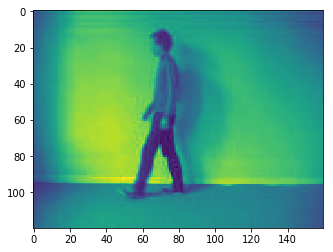

In [7]:
#Save Filtered Dataframe
for i in range(len(df)):
    print(i+1,"/",len(df))
    temp_image, temp_caption = df.iloc[i,:]['Image'], df.iloc[i,:]['Caption']
    plt.imshow(temp_image)
    print(temp_image.shape)
    temp_path = save_text_path+'File'+str(i)+'.txt'
    new = open(temp_path, 'w')
    count = 0
    for word in temp_caption.split():
        if os.path.exists(temp_path):
            new.write(word+" ")
    new.close()
    temp_path = save_image_path+'File'+str(i)+'.jpg'
    io.imsave(temp_path, temp_image)